<a href="https://colab.research.google.com/github/s24966904/note/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92/ClassfiactioTreeIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()

In [58]:
import pandas as pd

df=pd.DataFrame(iris["data"],columns=['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

target=pd.DataFrame(iris["target"],columns=['target_names'])
df["target"]=target
df.to_csv("iris.csv",encoding="utf-8",index=False)

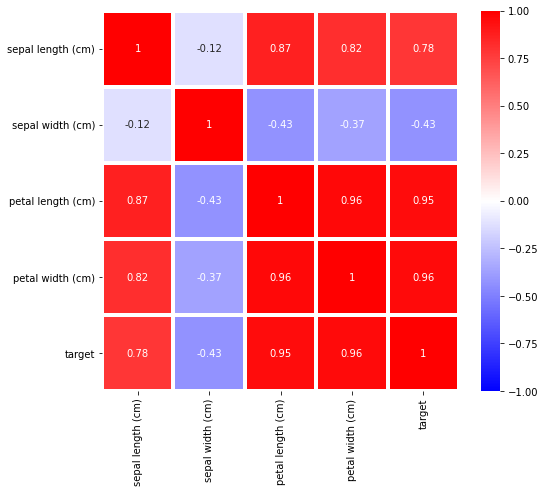

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.figure(figsize=(8,7))
sns.heatmap(df.astype(float).corr(),vmin=-1, vmax=1,center=0,annot=True,linewidths=3,cmap="bwr")#挑選顏色matplotlib colormap

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['target'],axis=1),df['target'],test_size=.1)

In [61]:
from sklearn.tree import DecisionTreeClassifier
clf =DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)
#gini係數 0~1越接近0代表資料純粹度越高
#entropy 亂度 0~1越接近0代表數值越亂

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

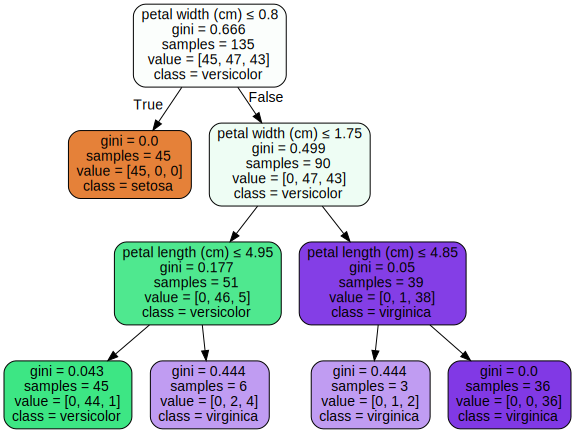

In [62]:
import graphviz
from sklearn.tree import export_graphviz
g=export_graphviz(clf,out_file=None,feature_names=iris['feature_names'],class_names=iris['target_names'],filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(g)
graph

In [63]:
pre =clf.predict(x_test)
print('預測標籤',list(pre))
print('真正標籤',list(y_test))

預測標籤 [2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1]
真正標籤 [2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1]


In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pre)

1.0

In [65]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre))

,0,1,2
0,5,0,0
1,0,3,0
2,0,0,7
